## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


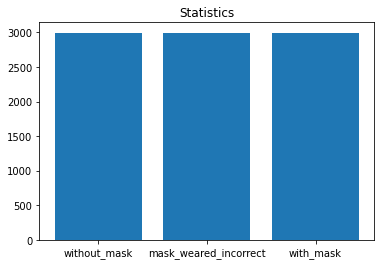

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:  #runs thrice
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)  #goes into without_mask, with_mask and mask_weared_incorrect folders
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

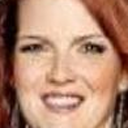

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

p = path + 'without_mask/2994.png'
img = cv2.imread(p, cv2.IMREAD_COLOR)
cv2_imshow(img)

In [8]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
print(img.shape)
input=img.shape

(128, 128, 3)


In [9]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
for label in output_classes:  #runs thrice
  this_path=path+label
  dir=pathlib.Path(this_path)
  img_list = os.listdir(dir)
  for i in img_list:
    p = this_path+'/'+i
    # print(p)
    img = cv2.imread(p, cv2.IMREAD_COLOR)
    # print(type(img.shape))
    if(img.shape!=input):
      cv2.resize(img, input)

In [ ]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it

In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [11]:
# Choose and define base model
from tensorflow.keras.applications.vgg16 import VGG16
model = Sequential()
model.add(VGG16(input_shape=input, weights='imagenet', include_top=False))

58900480/58889256 [==============================] - 1s 0us/step


In [12]:
# Print base model summary and have a look at the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [13]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for i in model.layers[:-1]:
    i.trainable = False

In [14]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
# model.add(Dense(3, activation = 'relu'))

In [15]:
# Add the final output layer
model.add(Flatten())
model.add(Dense(3, activation = 'relu'))

In [16]:
# Print your model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 3)                 24579     
                                                                 
Total params: 14,739,267
Trainable params: 14,739,267
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [18]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator  = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [19]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [20]:
# Your code
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=path,
                                          
                                                 target_size=(128, 128), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=path,
                                                 
                                                 target_size=(128,128), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [21]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

results = model.fit(train_dataset, validation_data = validation_dataset, epochs = 20)

Epoch 1/20
225/225 [==============================] - 55s 172ms/step - loss: 5.8357 - accuracy: 0.3591 - val_loss: 5.8237 - val_accuracy: 0.4119
Epoch 2/20
225/225 [==============================] - 35s 155ms/step - loss: 5.7522 - accuracy: 0.5121 - val_loss: 5.5950 - val_accuracy: 0.5730
Epoch 3/20
225/225 [==============================] - 35s 156ms/step - loss: 5.7923 - accuracy: 0.3870 - val_loss: 5.8345 - val_accuracy: 0.3333
Epoch 4/20
225/225 [==============================] - 36s 159ms/step - loss: 5.8337 - accuracy: 0.3463 - val_loss: 5.8327 - val_accuracy: 0.3333
Epoch 5/20
225/225 [==============================] - 36s 158ms/step - loss: 5.8264 - accuracy: 0.3880 - val_loss: 5.7607 - val_accuracy: 0.5106
Epoch 6/20
225/225 [==============================] - 36s 160ms/step - loss: 1.0718 - accuracy: 0.6443 - val_loss: 0.5828 - val_accuracy: 0.7809
Epoch 7/20
225/225 [==============================] - 36s 162ms/step - loss: 0.9428 - accuracy: 0.5358 - val_loss: 0.6668 - val_ac

### Evaluate the performance

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


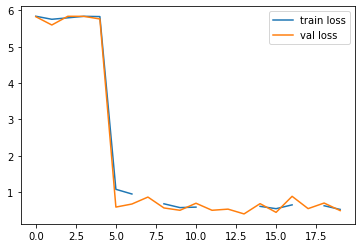

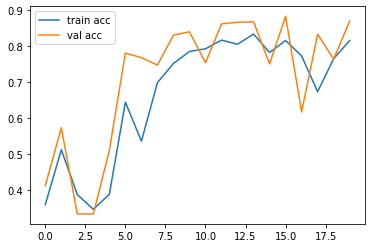

In [22]:
# Plot training & validation loss/accuracy values
import matplotlib.pyplot as plt
print(results.history.keys())

plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(results.history['accuracy'], label='train acc')
plt.plot(results.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(validation_dataset)
y = np.argmax(y_pred, axis=1)
print(classification_report(validation_dataset.classes, y, target_names=output_classes))
# print classification report

                       precision    recall  f1-score   support

         without_mask       0.32      0.34      0.33       598
mask_weared_incorrect       0.34      0.31      0.33       598
            with_mask       0.33      0.34      0.33       598

             accuracy                           0.33      1794
            macro avg       0.33      0.33      0.33      1794
         weighted avg       0.33      0.33      0.33      1794



In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)